# Strain

Note the **sample radius is 9.5 mm**, where the **PWJ radius is 2.5 mm**. Meaning for the waterjet to be fully on the sample you need an **$x$ position of $\pm$7 mm**. The step size was 0.2 mm ranging from $\pm$ 11.8 mm.

In [16]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
from pathlib import Path
from rich import print

ROOT = Path('.').absolute().parent
# NOTE: If you want the ROOT directory to be the same as the notebook 
# ROOT = Path('.').absolute()
DATA = ROOT / "paraview/experiment_overlap"
# NOTE: If you put the data in the same path as the notebook
#DATA = ROOT 
EXPORT = ROOT / "data"

VTR = 21.167 # mm/s

print(ROOT)
print(DATA)
print("VTR:", VTR, "mm/s")

/home/ddkn/phd/pwj/fem

/home/ddkn/phd/pwj/fem/paraview/experiment_overlap

VTR: 21.167 mm/s

In [5]:
data = list(DATA.glob("*.tsv"))
data = sorted(data)
print(data)

[
    PosixPath('/home/ddkn/phd/pwj/fem/paraview/experiment_overlap/sensor_bot.tsv'),
    PosixPath('/home/ddkn/phd/pwj/fem/paraview/experiment_overlap/sensor_mid.tsv'),
    PosixPath('/home/ddkn/phd/pwj/fem/paraview/experiment_overlap/sensor_top.tsv')
]

In [6]:
df = {}

for d, l in zip(data, ['bot', 'mid', 'top']):
    df[l] = pd.read_csv(d, delimiter='\t')
    df[l].rename(columns={"Time": "Time (s)", "avg(strain(z,z))": "Strain"}, inplace=True)
    df[l]["Position"] = [l] * df[l].shape[0]

print(df[l].columns)

Index(['Block Name', 'Row ID', 'avg(attribute)', 'avg(displacement (0))',
       'avg(displacement (1))', 'avg(displacement (2))',
       'avg(displacement (Magnitude))', 'Strain', 'avg(vtkOriginalPointIds)',
       'avg(vtkValidPointMask)', 'avg(X)', 'avg(Y)', 'avg(Z)',
       'max(attribute)', 'max(displacement (0))', 'max(displacement (1))',
       'max(displacement (2))', 'max(displacement (Magnitude))',
       'max(strain(z,z))', 'max(vtkOriginalPointIds)',
       'max(vtkValidPointMask)', 'max(X)', 'max(Y)', 'max(Z)',
       'med(attribute)', 'med(displacement (0))', 'med(displacement (1))',
       'med(displacement (2))', 'med(displacement (Magnitude))',
       'med(strain(z,z))', 'med(vtkOriginalPointIds)',
       'med(vtkValidPointMask)', 'med(X)', 'med(Y)', 'med(Z)',
       'min(attribute)', 'min(displacement (0))', 'min(displacement (1))',
       'min(displacement (2))', 'min(displacement (Magnitude))',
       'min(strain(z,z))', 'min(vtkOriginalPointIds)',
       'min(vtkValidPointMask)', 'min(X)', 'min(Y)', 'min(Z)', 'N',
       'q1(attribute)', 'q1(displacement (0))', 'q1(displacement (1))',
       'q1(displacement (2))', 'q1(displacement (Magnitude))',
       'q1(strain(z,z))', 'q1(vtkOriginalPointIds)', 'q1(vtkValidPointMask)',
       'q1(X)', 'q1(Y)', 'q1(Z)', 'q3(attribute)', 'q3(displacement (0))',
       'q3(displacement (1))', 'q3(displacement (2))',
       'q3(displacement (Magnitude))', 'q3(strain(z,z))',
       'q3(vtkOriginalPointIds)', 'q3(vtkValidPointMask)', 'q3(X)', 'q3(Y)',
       'q3(Z)', 'std(attribute)', 'std(displacement (0))',
       'std(displacement (1))', 'std(displacement (2))',
       'std(displacement (Magnitude))', 'std(strain(z,z))',
       'std(vtkOriginalPointIds)', 'std(vtkValidPointMask)', 'std(X)',
       'std(Y)', 'std(Z)', 'sum(attribute)', 'sum(displacement (0))',
       'sum(displacement (1))', 'sum(displacement (2))',
       'sum(displacement (Magnitude))', 'sum(strain(z,z))',
       'sum(vtkOriginalPointIds)', 'sum(vtkValidPointMask)', 'sum(X)',
       'sum(Y)', 'sum(Z)', 'Time (s)', 'vtkValidPointMask', 'Position'],
      dtype='object')

In [7]:
cols = ["Time (s)", "Position", "Strain"]
for k in df.keys():
    print(df[k][cols].head(10))

Time (s) Position    Strain
0    0.0000      bot  0.000004
1    0.0094      bot  0.000011
2    0.0189      bot  0.000020
3    0.0283      bot  0.000031
4    0.0378      bot  0.000041
5    0.0472      bot  0.000051
6    0.0567      bot  0.000067
7    0.0661      bot  0.000079
8    0.0756      bot  0.000089
9    0.0850      bot  0.000108

Time (s) Position    Strain
0    0.0000      mid  0.000004
1    0.0094      mid  0.000010
2    0.0189      mid  0.000019
3    0.0283      mid  0.000031
4    0.0378      mid  0.000041
5    0.0472      mid  0.000050
6    0.0567      mid  0.000066
7    0.0661      mid  0.000080
8    0.0756      mid  0.000081
9    0.0850      mid  0.000090

Time (s) Position    Strain
0    0.0000      top  0.000004
1    0.0094      top  0.000011
2    0.0189      top  0.000017
3    0.0283      top  0.000030
4    0.0378      top  0.000043
5    0.0472      top  0.000052
6    0.0567      top  0.000066
7    0.0661      top  0.000076
8    0.0756      top  0.000093
9    0.0850      top  0.000107

In [8]:
df_proc = (pd.concat([df['bot'], df['mid'], df['top']], axis=0)
    .pivot_table("Strain", index="Time (s)", columns=["Position"])
    .agg(["mean", "std"], axis=1))

df_proc

,mean,std
Time (s),,
0.0000,0.000004,1.514789e-07
0.0094,0.000011,2.825964e-07
0.0189,0.000019,1.301012e-06
0.0283,0.000031,6.373658e-07
0.0378,0.000042,1.198901e-06
...,...,...
1.0771,-0.000059,1.247059e-06
1.0866,-0.000042,1.255454e-06
1.0960,-0.000026,1.742685e-06


<ipython-input-20-0da0fec4ba72>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks)


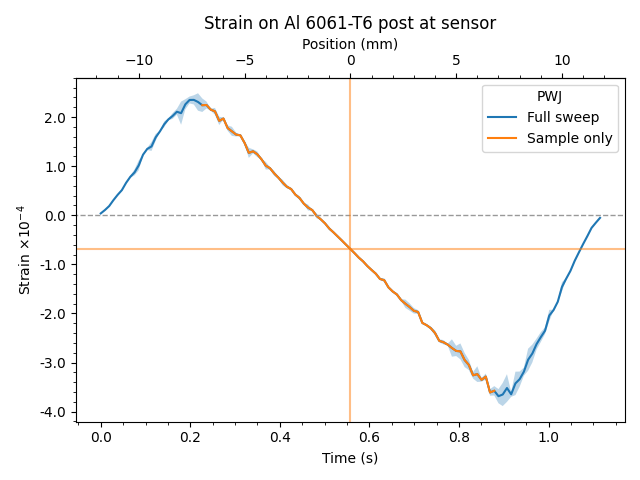

In [20]:
def time2dist(x):
    return (x * VTR) - 11.8 


def dist2time(x):
    return (x + 11.8) / VTR

fig, ax = plt.subplots(1, 1)

df_proc.plot(y="mean", ax=ax, legend=False)

pwj_sample_edge = 7
df_proc[
    (dist2time(-pwj_sample_edge) <= df_proc.index) 
    & (df_proc.index <= dist2time(pwj_sample_edge))
].plot(y="mean", ax=ax, legend=False, style="C1") 

ymin = df_proc["mean"].values - df_proc["std"].values
ymax = df_proc["mean"].values + df_proc["std"].values
ax.fill_between(df_proc.index, ymin, ymax, alpha=0.3)

xmin, xmax = ax.get_xlim()
ax.hlines(0, -xmax, xmax * 2, '#999', linewidth=1.0, linestyle='--')

y_center = df_proc["mean"][abs(df_proc.index - dist2time(0)) < 5E-3].mean()
ax.hlines(y_center, -xmax, xmax * 2, "C1", alpha=0.5)
ax.set_xlim(xmin, xmax)

ymin, ymax = ax.get_ylim()
ax.vlines(dist2time(0), -5, 5, "C1", alpha=0.5)
ax.set_ylim(ymin, ymax)

rescale = 1E-4
ticks = np.round(ax.get_yticks() / rescale)
ax.set_yticklabels(ticks)

ax.legend(["Full sweep", "Sample only"], title="PWJ")

secax = ax.secondary_xaxis('top', functions=(time2dist, dist2time))

ax.set_title("Strain on Al 6061-T6 post at sensor")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Strain $\\times 10^{{{}}}$".format(int(np.log10(rescale))))
ax.minorticks_on()

secax.set_xlabel('Position (mm)')
secax.minorticks_on()

fig.tight_layout()

In [32]:
P_hydraulic = 30E6 # Pa
# Multiplied by -1 for Circuit compatibility
strain_sim_at_30MPa = 0.000974938
volt_at_30MPa = 1.595

def calc_strain_max(x, v_cc=3.3, v_meas=1.595):
    return x * v_cc / v_meas


strain_max = calc_strain_max(strain_sim_at_30MPa)
print(f"Strain 30 MPa Hydraulic Press: {strain_sim_at_30MPa:0.3g}")
print(f"Strain max: {strain_max:0.3g}")


def strain2volt(x, strain_max=strain_max, v_cc=3.3):
    return x * v_cc / strain_max


def volt2strain(x, strain_max=strain_max, v_cc=3.3):
    return x * strain_max / v_cc

Strain 30 MPa Hydraulic Press: 0.000975

Strain max: 0.00202

In [38]:
df_export = df_proc.rename(columns={"mean": "Strain", "std": "Strain std"})
df_export["Sensor Strain"] = df_export["Strain"] * -1
df_export["Sensor Strain std"] = df_export["Strain std"] * -1
df_export["Position (mm)"] = time2dist(df_proc.index)
df_export["Voltage (V)"] = df_export["Sensor Strain"].apply(strain2volt)
df_export.reset_index().to_feather(EXPORT / "strain_sim.feather")
df_export.head()

,Strain,Strain std,Sensor Strain,Sensor Strain std,Position (mm),Voltage (V)
Time (s),,,,,,
0.0000,0.000004,1.514789e-07,-0.000004,-1.514789e-07,-11.800000,-0.006120
0.0094,0.000011,2.825964e-07,-0.000011,-2.825964e-07,-11.601030,-0.017414
0.0189,0.000019,1.301012e-06,-0.000019,-1.301012e-06,-11.399944,-0.030653
0.0283,0.000031,6.373658e-07,-0.000031,-6.373658e-07,-11.200974,-0.050231
0.0378,0.000042,1.198901e-06,-0.000042,-1.198901e-06,-10.999887,-0.068079


<ipython-input-39-dbfe374eb34d>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks)


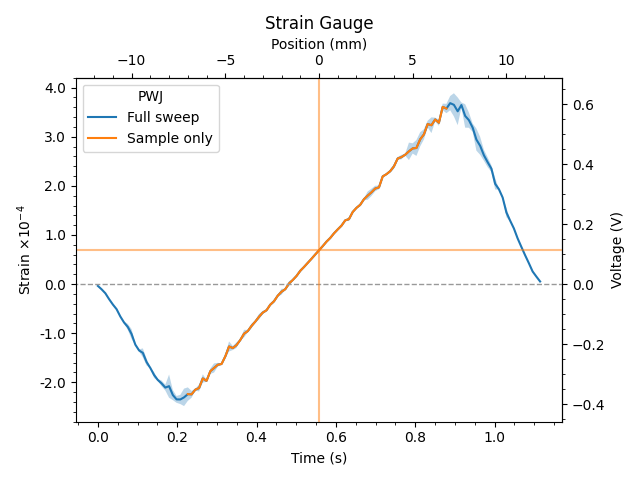

In [39]:
def time2dist(x):
    return (x * VTR) - 11.8 


def dist2time(x):
    return (x + 11.8) / VTR

fig, ax = plt.subplots(1, 1)

df_export.loc

df_export.plot(y="Sensor Strain", ax=ax, legend=False)

pwj_sample_edge = 7
df_export[
    (dist2time(-pwj_sample_edge) <= df_export.index) 
    & (df_export.index <= dist2time(pwj_sample_edge))
].plot(y="Sensor Strain", ax=ax, legend=False, style="C1") 

ymin = df_export["Sensor Strain"].values - df_export["Sensor Strain std"].values
ymax = df_export["Sensor Strain"].values + df_export["Sensor Strain std"].values
ax.fill_between(df_export.index, ymin, ymax, alpha=0.3)

xmin, xmax = ax.get_xlim()
ax.hlines(0, -xmax, xmax * 2, '#999', linewidth=1.0, linestyle='--')

y_center = df_export["Sensor Strain"][abs(df_export.index - dist2time(0)) < 5E-3].mean()
ax.hlines(y_center, -xmax, xmax * 2, "C1", alpha=0.5)
ax.set_xlim(xmin, xmax)

ymin, ymax = ax.get_ylim()
ax.vlines(dist2time(0), -5, 5, "C1", alpha=0.5)
ax.set_ylim(ymin, ymax)

rescale = 1E-4
ticks = np.round(ax.get_yticks() / rescale)
ax.set_yticklabels(ticks)

ax.legend(["Full sweep", "Sample only"], title="PWJ")

ax.set_title("Strain Gauge")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Strain $\\times 10^{{{}}}$".format(int(np.log10(rescale))))
ax.minorticks_on()

secxax = ax.secondary_xaxis('top', functions=(time2dist, dist2time))
secxax.set_xlabel('Position (mm)')
secxax.minorticks_on()

secyax = ax.secondary_yaxis('right', functions=(strain2volt, volt2strain))
secyax.set_ylabel('Voltage (V)')
secyax.minorticks_on()

fig.tight_layout()